<a href="https://colab.research.google.com/github/pavans-reddy/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

In [1]:
# Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/sentiment analysis/training.1600000.processed.noemoticon.csv", delimiter=',', encoding = 'ISO-8859-1' )

In [3]:
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [5]:
df.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [6]:
df.columns=['sentiment','id','date','query','username','text']

In [7]:
df.head()

,sentiment,id,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
df.shape

(1048572, 6)

In [9]:
df['sentiment'].value_counts()

0    799996
4    248576
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='Count'>

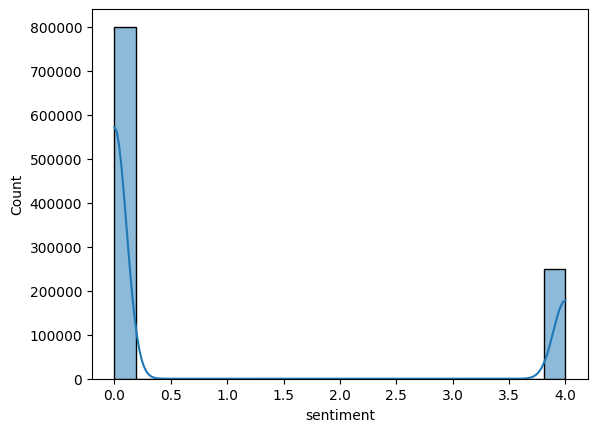

In [10]:
sns.histplot(df['sentiment'],kde=True)

<Axes: ylabel='count'>

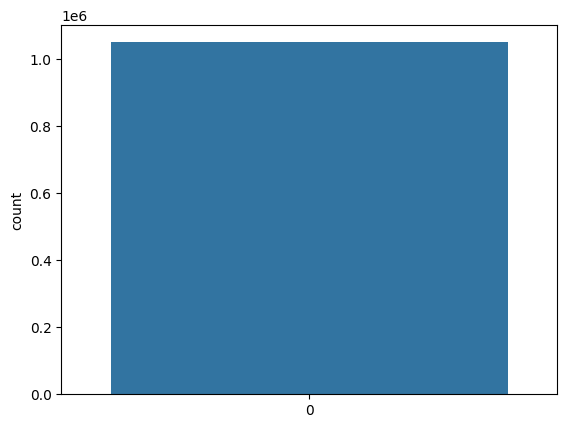

In [11]:
sns.countplot(df['sentiment'])

In [12]:
df['query'].value_counts()

NO_QUERY    1048572
Name: query, dtype: int64

In [13]:
# Dropping unnecessary columns
df = df.drop(columns = "query")

In [14]:
df.head()

,sentiment,id,date,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [15]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
stopwords = stopwords.words('english')


In [18]:
data1 = []
data2 = []

for i in df.index:
  review = df['text'][i]
  review = re.sub('[^a-zA-Z]',' ',review)
  review = review.lower()
  review = review.split()
  lem = WordNetLemmatizer()
  review = [lem.lemmatize(word) for word in review if word not in stopwords]
  data1.append(review)
  review = ' '.join(review)
  data2.append(review)

In [19]:
clean_data = pd.DataFrame()
clean_data["review"] = data2
clean_data["sentiment"] = df['sentiment'].values

In [20]:
clean_data.head()

,review,sentiment
0,upset update facebook texting might cry result...,0
1,kenichan dived many time ball managed save res...,0
2,whole body feel itchy like fire,0
3,nationwideclass behaving mad see,0
4,kwesidei whole crew,0


In [21]:
data_eda = pd.DataFrame()
data_eda["review"] = data1
data_eda["sentiment"] = df['sentiment'].values

In [22]:
data_eda.head()

,review,sentiment
0,"[upset, update, facebook, texting, might, cry,...",0
1,"[kenichan, dived, many, time, ball, managed, s...",0
2,"[whole, body, feel, itchy, like, fire]",0
3,"[nationwideclass, behaving, mad, see]",0
4,"[kwesidei, whole, crew]",0


In [23]:
positive = data_eda[data_eda['sentiment'] == 4]
positive_list = positive['review'].tolist()
negative = data_eda[data_eda['sentiment'] == 0]
negative_list = negative['review'].tolist()

In [24]:
positive_words = " ".join([word for sentence in positive_list for word in sentence])
negative_words = " ".join([word for sentence in negative_list for word in sentence])


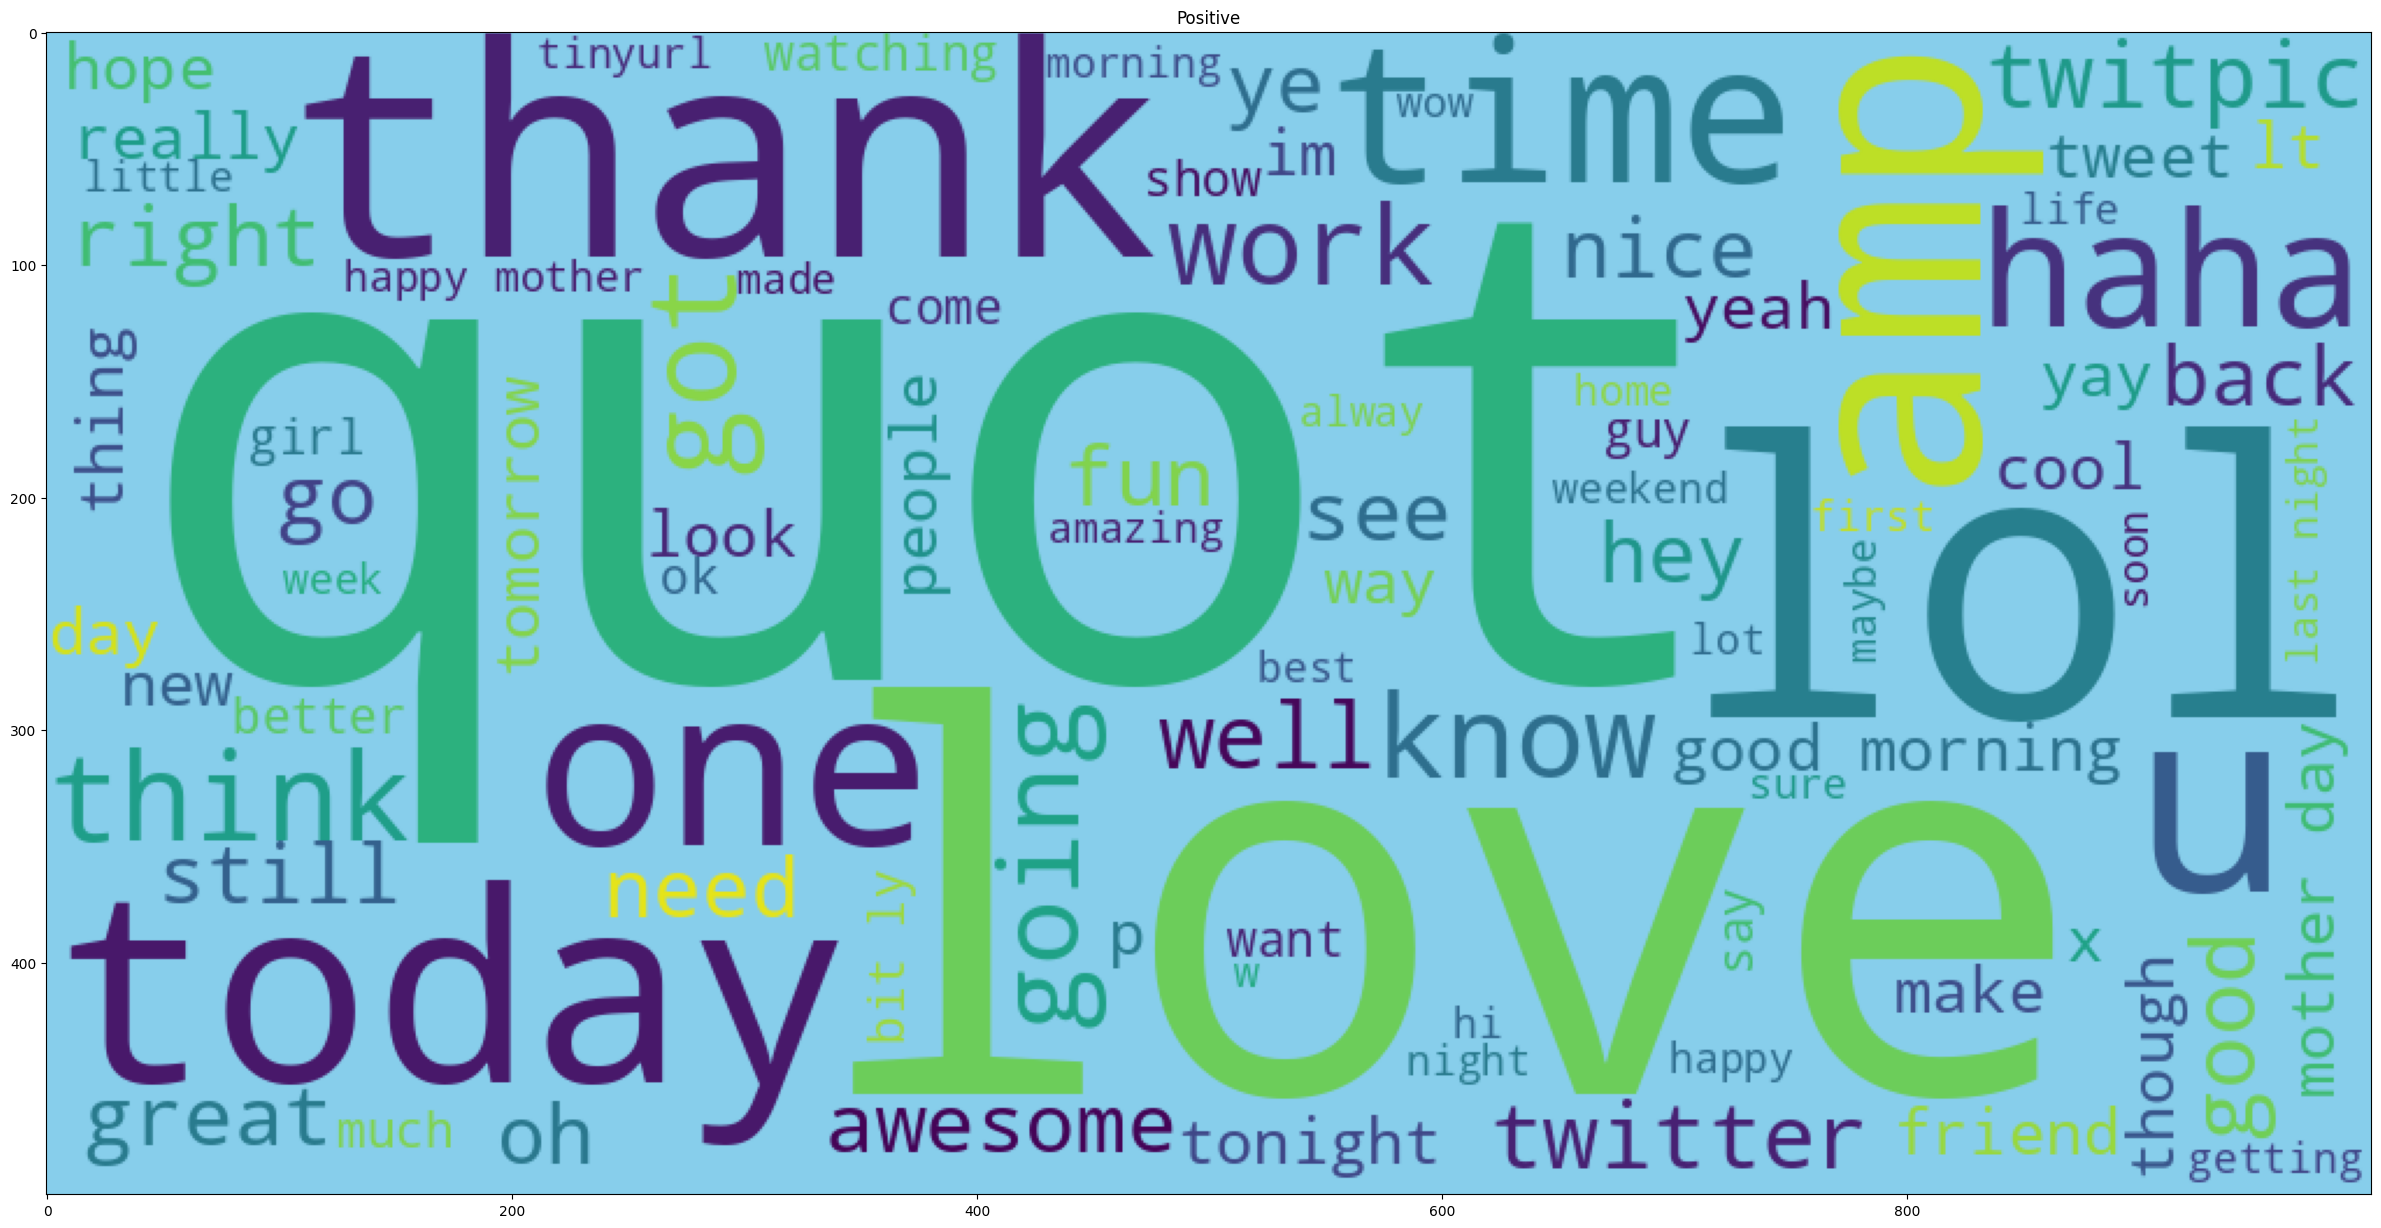

In [25]:
# Word cloud for positive data
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(positive_words)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

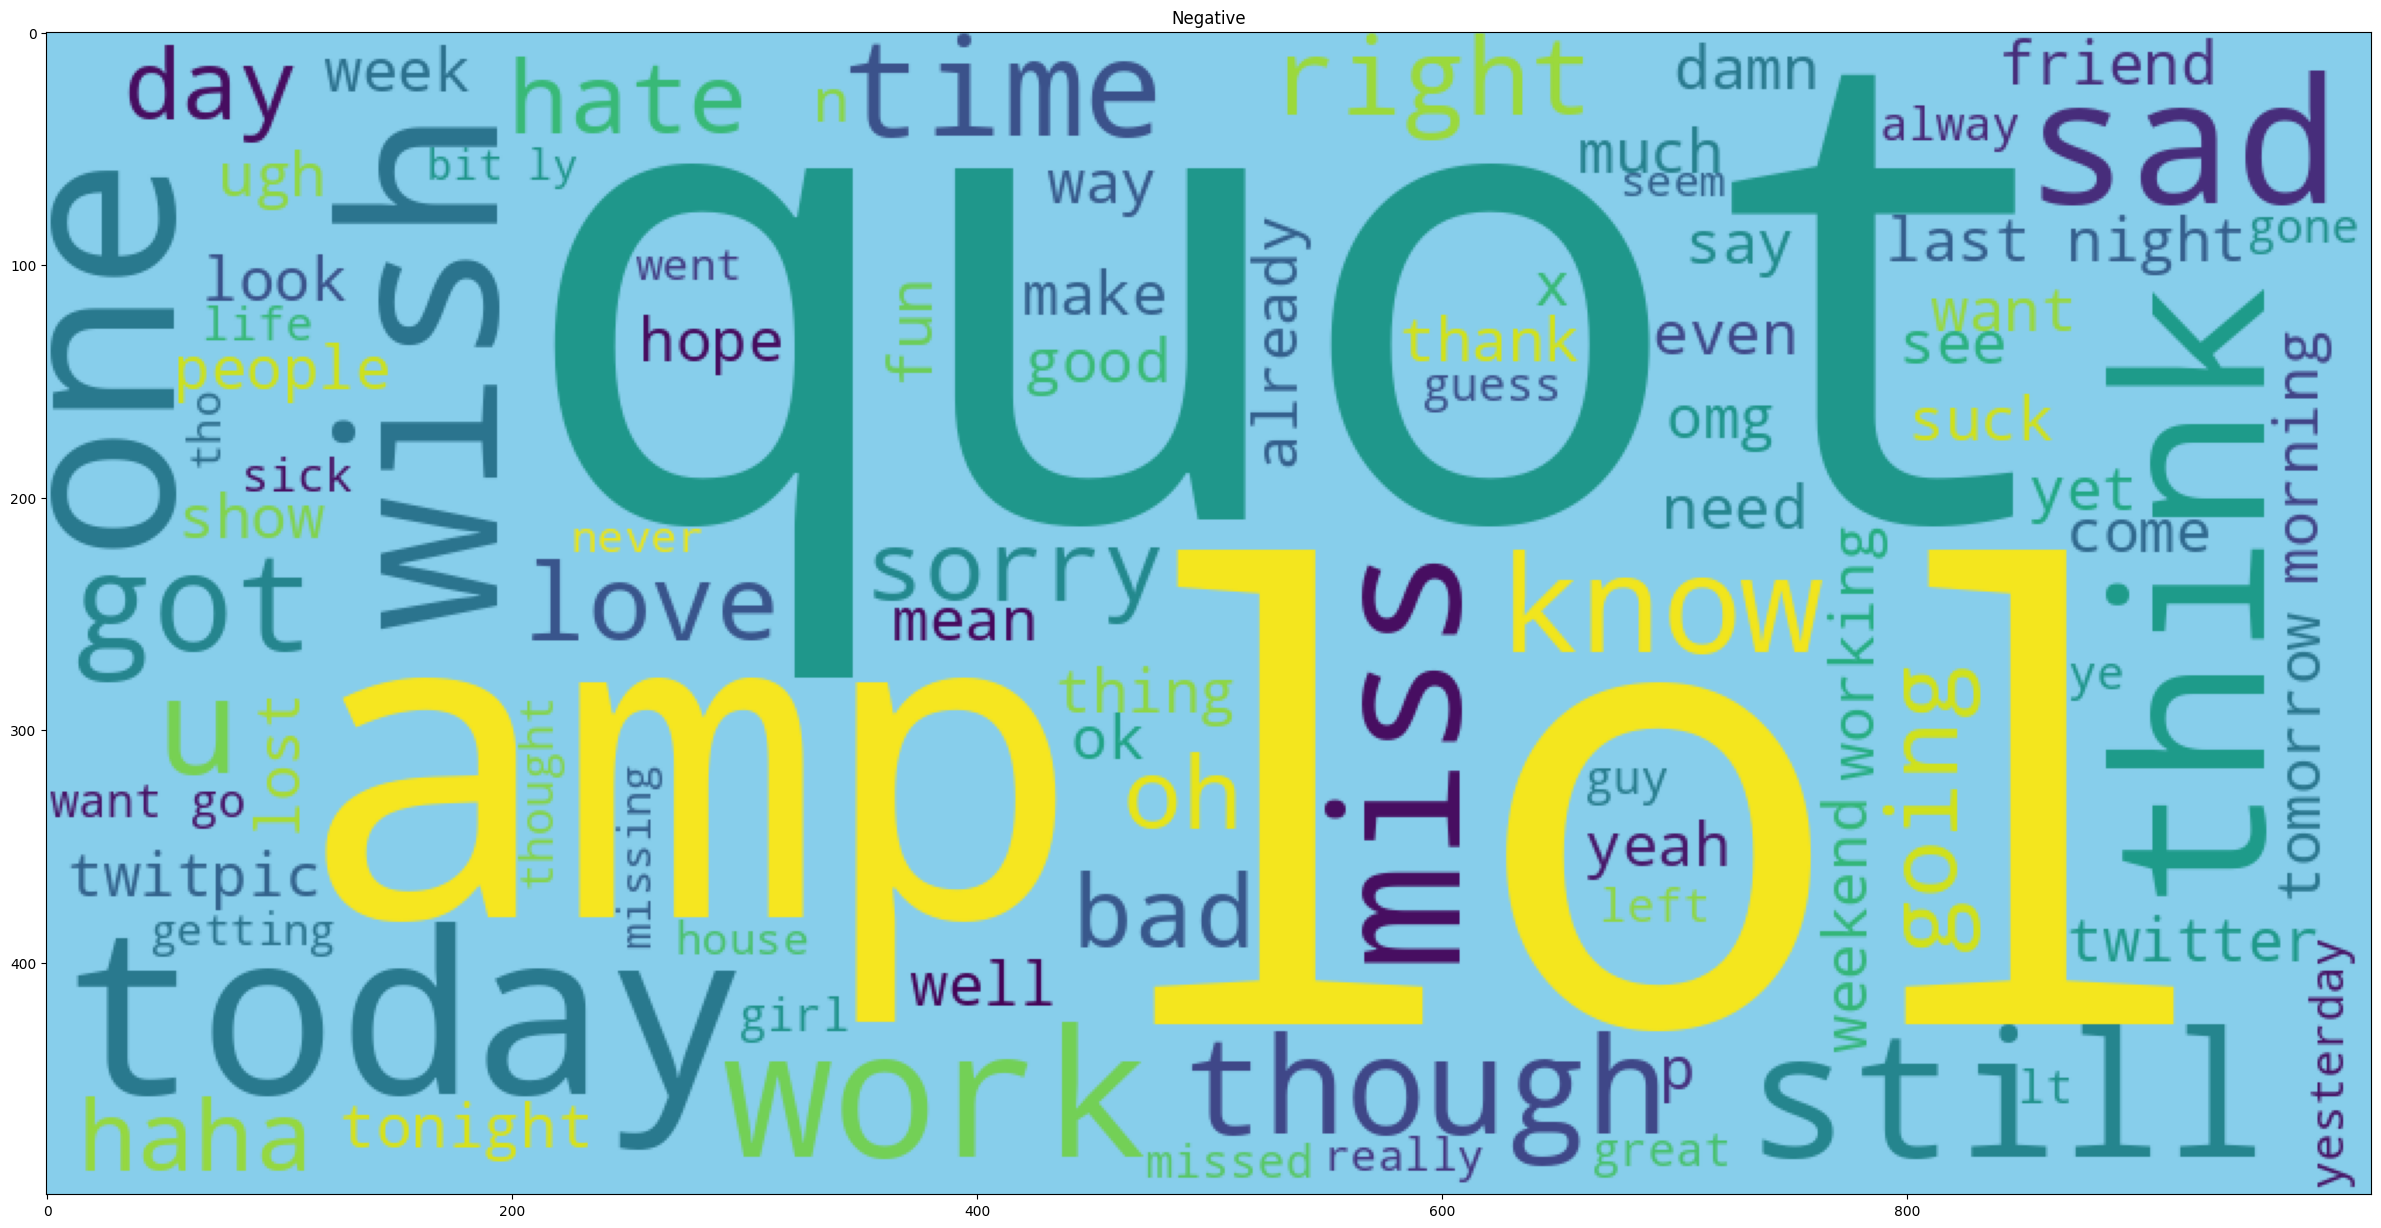

In [26]:
# Word cloud for negative data
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=1000,
                      height=500,
                      background_color='skyblue',
                      max_words = 90).generate(negative_words)
plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.title("Negative")
plt.show()

In [27]:
# Convert text to num

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

x = cv.fit_transform(clean_data['review'])
y = clean_data['sentiment']

In [28]:
# Split training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [29]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train,y_train)

LogisticRegression()

In [30]:
# Accuracy Score
from sklearn.metrics import accuracy_score
logistic_regression_model.score(x_train,y_train)

0.8592561068215441

In [42]:
# Testing
def sentiment(text):
    data = []
    review = text
    review = re.sub('[^a-zA-Z]',' ',review)
    review = review.lower()
    review = review.split()
    review = [lem.lemmatize(word) for word in review if word not in stopwords]
    review = ' '.join(review)
    data.append(review)
    data = cv.transform(data)
    prediction = logistic_regression_model.predict(data)
    if prediction == 4:
      print("Positive review 😊")
    else:
      print("Negative review 🥲")

text = input("Comment your review: ")
sentiment(text)

Comment your review: I absolutely loved the product! It's high-quality and exactly what I was looking for
Positive review 😊
